In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/sahil-gidwani/DL/main/data/BostonHousing.csv")

In [55]:
df.head()

# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s ------ TARGET

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [57]:
df.dropna(inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


<Axes: >

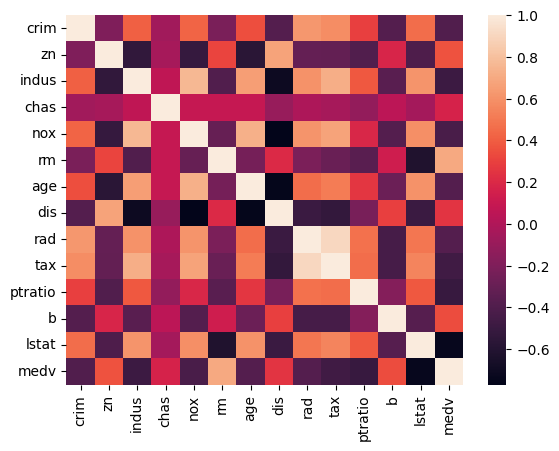

In [59]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix)

In [60]:
# sns.pairplot(df)

In [61]:
X = df.drop('medv', axis = 1)
Y = df['medv']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 13)
(101, 13)
(400,)
(101,)


In [63]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [66]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('Mean Squared Error (MSE) is {}'.format(mse))
print('Root Mean Squared Error (RMSE) is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
Mean Squared Error (MSE) is 24.01820499335492
Root Mean Squared Error (RMSE) is 4.900837172703754
R2 score is 0.7228401400552944


In [67]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('Mean Squared Error (MSE) is {}'.format(mse))
print('Root Mean Squared Error (RMSE) is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
Mean Squared Error (MSE) is 14.399833982202669
Root Mean Squared Error (RMSE) is 3.794711317373519
R2 score is 0.8167466607594582
